In [3]:
import os
from pathlib import Path
root = Path('/Users/user/Coding/EV-D68-3C-protease/')
os.chdir(root)

In [8]:
from rdkit import Chem

with Chem.SDMolSupplier('hits.sdf') as sds:
    hitdex = {h.GetProp('_Name').replace('§', '_'): h for h in sds}

In [9]:
good_ids = ['x0147_0A_1',
 'x0771_1A_1',
 'x0789_0A_1',
 'x0980_0B_1',
 'x1083_0A_1',
 'x1247_0A_1',
 'x1305_0B_1',
 'x1498_1B_1',
 'x1594_0A_1',
 'x1604_0A_1']

print('enable '+' '.join(good_ids))

enable x0147_0A_1 x0771_1A_1 x0789_0A_1 x0980_0B_1 x1083_0A_1 x1247_0A_1 x1305_0B_1 x1498_1B_1 x1594_0A_1 x1604_0A_1


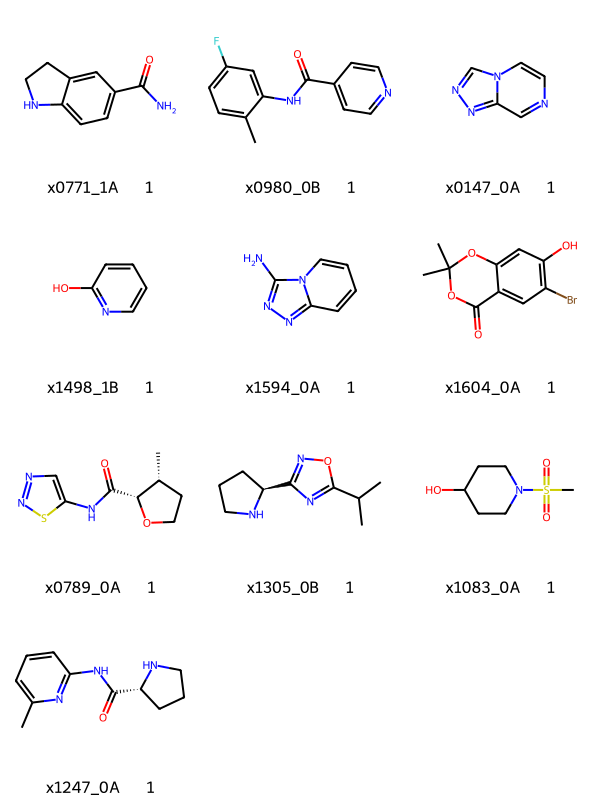

In [30]:
from rdkit.Chem import Draw, AllChem
from typing import List
from IPython.display import Image

def flatgrid(mols, *args, **kwargs) -> Image:
    copies: List[Chem.Mol] = [Chem.Mol(m) for m in mols]
    *map(AllChem.Compute2DCoords, copies),   # noqa, it's in place
    if 'legends' not in kwargs:
        kwargs['legends'] = [m.GetProp('_Name') if m.HasProp('_Name') else '-' for m in mols]
    return Draw.MolsToGridImage(copies, *args, **kwargs)

goods = [m for n, m in hitdex.items() if n in good_ids]

flatgrid(goods)

In [31]:
water = Chem.MolFromPDBBlock('HETATM    1  O   HOH S  67      -7.939  13.577 -32.483  1.00 33.68           O  ')
water.SetProp('_Name', 'SteppingStone67')
goods.append(water)

water = Chem.MolFromPDBBlock('HETATM    1  O   HOH S 164      -6.059   6.299 -34.726  1.00 47.48           O  ')
water.SetProp('_Name', 'oxyanion164')
goods.append(water)

In [32]:
with Chem.SDWriter('of-interest.sdf') as sdfh:
    for mol in goods:
        sdfh.write(mol)

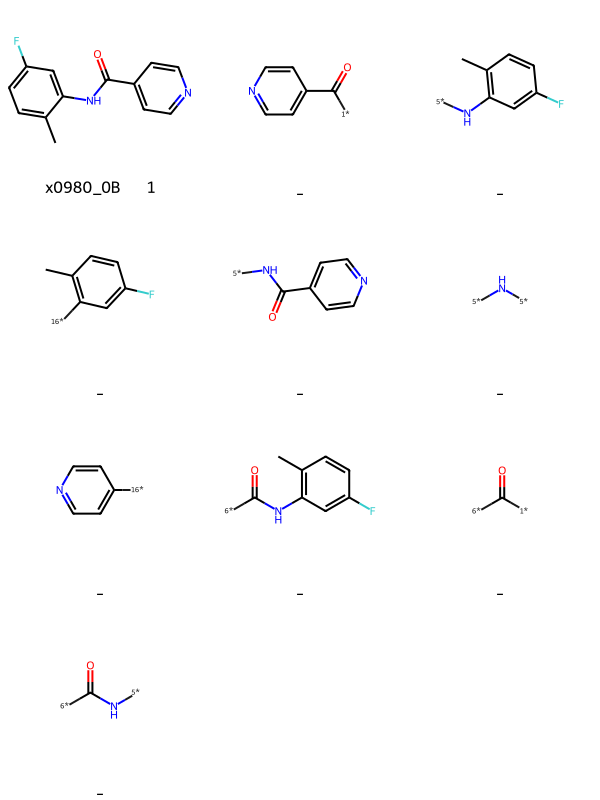

In [28]:
from rdkit.Chem import BRICS

flatgrid(list(BRICS.BRICSDecompose(hitdex['x0980_0B_1'], returnMols=True, keepNonLeafNodes=True)))

In [34]:
!ls workshop/D

D68EV3CPROA                   x1594-bad-benzene.png
x1594-bad-benzene-surface.png


In [35]:
good_ids

['x0147_0A_1',
 'x0771_1A_1',
 'x0789_0A_1',
 'x0980_0B_1',
 'x1083_0A_1',
 'x1247_0A_1',
 'x1305_0B_1',
 'x1498_1B_1',
 'x1594_0A_1',
 'x1604_0A_1']

In [43]:

import pymol2, re

with pymol2.PyMOL() as pymol:
    pymol.cmd.load('reference.pdb')
    for name in good_ids:
        code = re.sub(r'_1$', '', name) 
        pymol.cmd.load(f'/Users/user/Coding/EV-D68-3C-protease/workshop/D68EV3CPROA/aligned/D68EV3CPROA-{code}/D68EV3CPROA-{code}_bound.pdb',
                       code)
        pymol.cmd.align(code + ' and chain ' + code[-1], 'reference and chain A')
    pymol.cmd.show('sticks', 'reference and resi 22+40+147+161')
    pymol.cmd.zoom('reference and resi 22+40+147+161')
    pymol.cmd.save('interesting.pse')

In [44]:


from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools, BRICS
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import pandera.typing as pdt
from typing import List, Dict

  
with open('reference.pdb') as fh:
    pdbblock = fh.read()
    
# ------------------------------------------------------
    
import logging
import pyrosetta_help as ph
import pyrosetta

logger = ph.configure_logger()
logger.handlers[0].setLevel(logging.ERROR)  # logging.WARNING = 30
extra_options = ph.make_option_string(no_optH=False,
                                      ex1=None,
                                      ex2=None,
                                      #mute='all',
                                      ignore_unrecognized_res=True,
                                      load_PDB_components=False,
                                      ignore_waters=True)
pyrosetta.init(extra_options=extra_options)

PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.16+release.942c01d5066fd96860b7d268702b832fe906a739 2023-04-12T15:05:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [45]:
water_net = Chem.MolFromPDBBlock('''HETATM    1  O   HOH S  74      -7.729   8.762 -36.076  1.00 71.88           O  
HETATM    2  O   HOH S 164      -6.505   6.915 -34.335  1.00 46.51           O  
HETATM    3  O   HOH S 293      -5.517   4.812 -38.802  1.00 58.90           O  
HETATM    4  O   HOH S 302      -6.887   3.806 -35.540  1.00 55.88           O  
HETATM    5  O   HOH S 313      -5.837   5.810 -36.757  1.00 42.01           O  
END''')

In [56]:
Chem.MolToMolFile(water_net, 'oxyanion-waters.mol')

In [52]:
import os, re
import pyrosetta, logging
import pandas as pd
from rdkit import Chem
from fragmenstein import Victor, Laboratory

vicky = Victor([water_net], pdb_block=pdbblock).combine(long_name='waternet')

[17:02:05] Explicit valence for atom # 1 O, 3, is greater than permitted
[17:02:05] Explicit valence for atom # 1 O, 3, is greater than permitted
[17:02:05] Explicit valence for atom # 1 O, 3, is greater than permitted
[17:02:05] Explicit valence for atom # 1 O, 3, is greater than permitted
Name clash  O  , second one now called  N1 
Name clash  O  , second one now called  O2 
Name clash  O  , second one now called  O3 
Name clash  O  , second one now called  O4 


In [54]:
vicky.summarize()

{'name': 'waternet',
 'smiles': '[H]OC([H])([H])OC([H])([H])N(C([H])([H])O[H])C([H])([H])O[H]',
 'error': '',
 'mode': 'none_permissive',
 '∆∆G': -1.628644713131424,
 '∆G_bound': -1.1803185377067307,
 '∆G_unbound': 0.4483261754246932,
 'comRMSD': 1.040278232012955,
 'N_constrained_atoms': 5,
 'N_unconstrained_atoms': 4,
 'runtime': 5.48912787437439,
 'regarded': ['hit0'],
 'disregarded': []}

In [70]:
hitdex['x1594_0A_1'].GetSubstructMatch(Chem.MolFromSmarts('N-c:n:n'))

(0, 1, 3, 5)

In [66]:
hitdex['x1594_0A_1'].GetProp('_Name')

'x1594_0A§1'

In [74]:
# custom_map={'x1594_0A§1': {-1: 0, 3: 5, 5: 4}}
vicky = Victor([hitdex['x1594_0A_1']], pdb_block=pdbblock).place('c1ccnnc1N', long_name='ZINC1621830',custom_map={'x1594_0A§1': {3: 4, 5: 3, -1: 6}})
vicky.summarize()

ZINC1621830 - Folder output/ZINC1621830 exists.
[13:38:54] Molecule does not have explicit Hs. Consider calling AddHs()
[13:38:54] Molecule does not have explicit Hs. Consider calling AddHs()


{'name': 'ZINC1621830',
 'smiles': 'c1ccnnc1N',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -2.4420569769918314,
 '∆G_bound': -2.406471842092425,
 '∆G_unbound': 0.03558513489940646,
 'comRMSD': 1.4837581676270573,
 'N_constrained_atoms': 10,
 'N_unconstrained_atoms': 1,
 'runtime': 5.190892934799194,
 'regarded': ['x1594_0A§1'],
 'disregarded': []}

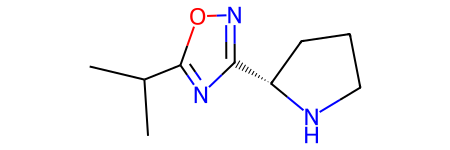

In [75]:

hitdex['x1305_0B_1']